In [1]:
import numpy as np
import matplotlib.pyplot as plt
import Tools
import ROOT

Welcome to JupyROOT 6.24/08


In [2]:
ttt = plt.style.use( Tools.mpl_style_file )
ttt = plt.figure()

<Figure size 700x490 with 0 Axes>

In [73]:
### Load the file
primary = 'Proton'
path = f'FTFP_BERT_{primary}_1TeV_Bi_1e6-11-2.root'

path = 'FTFP_BERT_Proton_1TeV_Bi_1e5-10-05-p01.root'
path = 'FTFP_BERT_Proton_1TeV_Ge_1e5-10-05-p01.root'
path = 'FTFP_BERT_Proton_1TeV_BGO_1e5-10-05-p01.root'


TF = ROOT.TFile(path)

In [74]:
rr = range(14,16) if( '11-2' in path ) else range(13,15) 


dd = {}
for i in rr:
    Hist = TF.Get(f'{i}')
    dd[i] = {}
    dd[i]['bins'] = []
    dd[i]['bin_center'] = []
    dd[i]['values'] = []
    for j in range(1, Hist.GetNbinsX()+1 ):
        dd[i]['bins'].append( Hist.GetBinLowEdge(j) )
        dd[i]['bin_center'].append( Hist.GetBinCenter(j) )
        dd[i]['values'].append( Hist.GetBinContent(j) )
    dd[i]['bins'].append( Hist.GetBinLowEdge(j)+Hist.GetBinWidth(j) )
    
    for key in dd[i]:
        dd[i][key] = np.array(dd[i][key])

    print(i, np.sum(dd[i]['values']))

13 100000.0
14 29351.0


Content last bin: 0.05812
Frac where type(max-E-sec)=primary in last bin: 0.19801710333549113


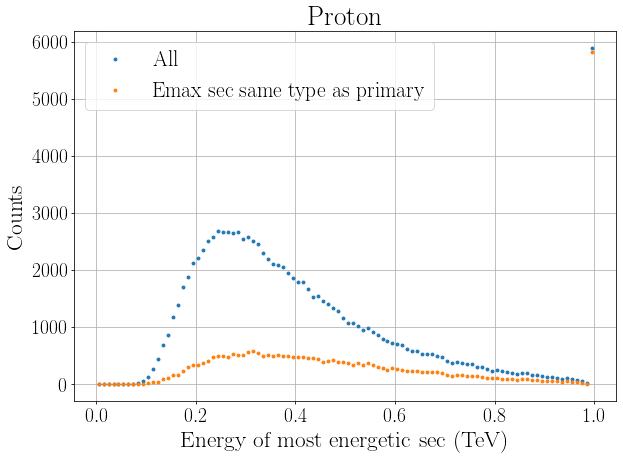

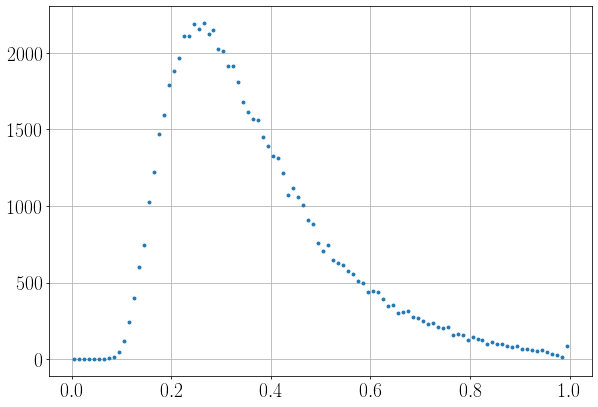

In [75]:
translate = {13: 'All', 14: 'Emax sec same type as primary'}
# translate = {14: 'All', 15: 'Emax sec same type as primary'}

for i in rr:
    ttt = plt.plot(dd[i]['bin_center'], dd[i]['values'], marker='.', linestyle='', label=translate[i])
ttt = plt.legend(fontsize=22)
ttt = plt.xlabel('Energy of most energetic sec (TeV)')
ttt = plt.ylabel('Counts')
ttt = plt.title(primary)
ttt = plt.savefig(f'{primary}.pdf', bbox_inches='tight')

ttt = plt.figure()
ttt = plt.plot(dd[13]['bin_center'], dd[13]['values']-dd[14]['values'], marker='.', linestyle='')

print('Content last bin:', dd[14]['values'][-1]/np.sum(dd[13]['values']))
print('Frac where type(max-E-sec)=primary in last bin:', dd[14]['values'][-1]/np.sum(dd[14]['values']))

In [68]:
np.sum(dd[13]['values'])

1574.0

In [42]:
dd[13]['values']

array([0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       2.000e+00, 3.000e+00, 3.400e+01, 9.000e+01, 1.870e+02, 3.590e+02,
       5.940e+02, 8.990e+02, 1.182e+03, 1.411e+03, 1.813e+03, 2.029e+03,
       2.264e+03, 2.495e+03, 2.660e+03, 2.790e+03, 2.845e+03, 2.881e+03,
       2.941e+03, 3.006e+03, 2.873e+03, 2.813e+03, 2.744e+03, 2.658e+03,
       2.674e+03, 2.494e+03, 2.471e+03, 2.415e+03, 2.309e+03, 2.144e+03,
       2.061e+03, 1.934e+03, 1.889e+03, 1.836e+03, 1.856e+03, 1.653e+03,
       1.536e+03, 1.523e+03, 1.425e+03, 1.334e+03, 1.245e+03, 1.256e+03,
       1.254e+03, 1.133e+03, 1.070e+03, 1.036e+03, 9.120e+02, 9.130e+02,
       9.020e+02, 8.330e+02, 7.780e+02, 7.300e+02, 7.220e+02, 6.600e+02,
       6.080e+02, 6.430e+02, 5.680e+02, 5.340e+02, 5.110e+02, 4.670e+02,
       4.260e+02, 4.620e+02, 3.900e+02, 3.770e+02, 3.390e+02, 3.410e+02,
       3.070e+02, 2.740e+02, 2.780e+02, 2.780e+02, 2.400e+02, 2.240e+02,
       1.970e+02, 2.200e+02, 1.850e+02, 1.640e+02, 

In [64]:
with open(f'FTFP_BERT_{primary}_1TeV_Bi_1e6-11-2.log', 'r') as infile:
    lines = infile.readlines()

In [65]:
nucl_int = []
add = False
for line in lines:
    if( 'List of nuclear reactions:' in line ):
        add = True
    elif( 'number of gamma or e-' in line ):
        break
    if(add):
        nucl_int.append(line.replace('\n',''))
nucl_int = nucl_int[2:-1]

In [71]:
int_types = {}
N_int = int( len(nucl_int)/2 )
for i in range(N_int):
    res = nucl_int[2*i].split('N gamma or e- +')[-1][1:-2]
    Emax = float(nucl_int[2*i+1].split()[-1])*1e-6
    N_instances = int(nucl_int[2*i+1].split()[0])
    if( Emax>0.9 ):
        int_types[res] = (N_instances, Emax)

In [72]:
count = 0
for key in int_types:
    N_instances, Emax = int_types[key]
    if( N_instances>count ):
        max_int = key
        count = N_instances

print(max_int, int_types[max_int])

10 proton + 16 neutron + deuteron + Ta172 (2, 0.99839)


In [9]:
Hist = TF.Get('15')

In [10]:
c = ROOT.TCanvas("myCanvasName","The Canvas Title",800,600)
Hist.Draw()

In [11]:
%jsroot on
c.Draw()